# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [1]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv("rym_top5000.csv")

In [15]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [16]:
df_1 = df.groupby(['Artist Name'])['Artist Name'].count().reset_index(name='counts')
fiveplus = df_1[df_1.counts>5]['Artist Name'].tolist()

df_1 = df[df['Artist Name'].isin(fiveplus)]
df_1 = df_1.groupby(['Artist Name'])['Average Rating'].median().reset_index(name='Median Rating')
df_1.sort_values(by='Median Rating', ascending=False).head(10).reset_index().drop('index', axis=1)

,Artist Name,Median Rating
0,David Bowie,4.050
1,The Beatles,4.045
2,King Crimson,3.970
3,The Rolling Stones,3.965
4,Black Sabbath,3.950
5,Led Zeppelin,3.940
6,Pink Floyd,3.910
7,Death,3.905
8,John Coltrane,3.905
9,Bob Dylan,3.890


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [5]:
df_tmp = df
df_tmp = df_tmp.groupby(['Artist Name'])['Average Rating'].agg(['max', 'min', lambda x: x.max()-x.min()])
df_tmp.columns = ['Best Rating', 'Worst Rating', 'Rating Gap']
df_tmp = df_tmp.sort_values(by='Rating Gap', ascending=False).head(10)
print(df_tmp)

                     Best Rating  Worst Rating  Rating Gap
Artist Name                                               
Kendrick Lamar              4.27          3.52        0.75
The Beatles                 4.25          3.55        0.70
Pink Floyd                  4.29          3.60        0.69
My Bloody Valentine         4.24          3.58        0.66
King Crimson                4.30          3.67        0.63
John Coltrane               4.30          3.70        0.60
Radiohead                   4.23          3.66        0.57
Miles Davis                 4.23          3.69        0.54
The Cure                    4.17          3.63        0.54
Kanye West                  4.07          3.54        0.53


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [9]:
import copy
df_tmp = copy.deepcopy(df)
df_tmp['Number of Ratings'] = df_tmp['Number of Ratings'].transform(lambda x: int(x.replace(',', '')))
df_tmp = df_tmp[(df_tmp['Number of Ratings']>=5000) & (df_tmp['Number of Reviews']>=15)]
df_tmp['Ratio'] = (df_tmp['Number of Ratings'])/(df_tmp['Number of Reviews'])
df_tmp = df_tmp.sort_values(by='Ratio', ascending=False)[['Album', 'Artist Name', 'Number of Ratings', 'Number of Reviews', 'Ratio']].head(10)
print(df_tmp)

                                      Album         Artist Name  \
353   Jenny Death: The Powers That B Disc 2         Death Grips   
1695               Bury Me at Makeout Creek              Mitski   
3733                   春と修羅 (Haru to Shura)  春ねむり [Haru Nemuri]   
4949                             Saturation        Brockhampton   
1036                         Saturation III        Brockhampton   
2489                                Scenery     福居良 [Ryo Fukui]   
643                                 Endless         Frank Ocean   
2869                               Imperial        Denzel Curry   
950                           Saturation II        Brockhampton   
439                          Bottomless Pit         Death Grips   

      Number of Ratings  Number of Reviews       Ratio  
353               10855                 30  361.833333  
1695               5856                 19  308.210526  
3733               6277                 23  272.913043  
4949              17629           

#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [10]:
df_tmp = copy.deepcopy(df)
df_tmp['Number of Ratings'] = df_tmp['Number of Ratings'].transform(lambda x: int(x.replace(',', '')))
df_tmp['Year'] = df_tmp['Release Date'].transform(lambda x:x[-4:])
#a
q3a = df_tmp['Number of Ratings'].quantile(.75)
df_a = df_tmp[df_tmp['Number of Ratings'] > q3a]
df_a = df_a.groupby(['Year'])['Year'].count().reset_index(name='Albums with many ratings')
df_a = df_a.sort_values(by='Albums with many ratings', ascending=False).head(5).reset_index().drop('index', axis=1)
print(df_a)
#b
q3b = df_tmp['Number of Reviews'].quantile(.75)
df_b = df_tmp[df_tmp['Number of Reviews'] > q3b]
df_b = df_b.groupby(['Year'])['Year'].count().reset_index(name='Albums with many reviews')
df_b = df_b.sort_values(by='Albums with many reviews', ascending=False).head(5).reset_index().drop('index', axis=1)
print(df_b)


   Year  Albums with many ratings
0  1994                        41
1  1971                        36
2  1970                        35
3  1996                        34
4  1995                        33
   Year  Albums with many reviews
0  1970                        43
1  1971                        41
2  1969                        38
3  1994                        36
4  1995                        34


## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

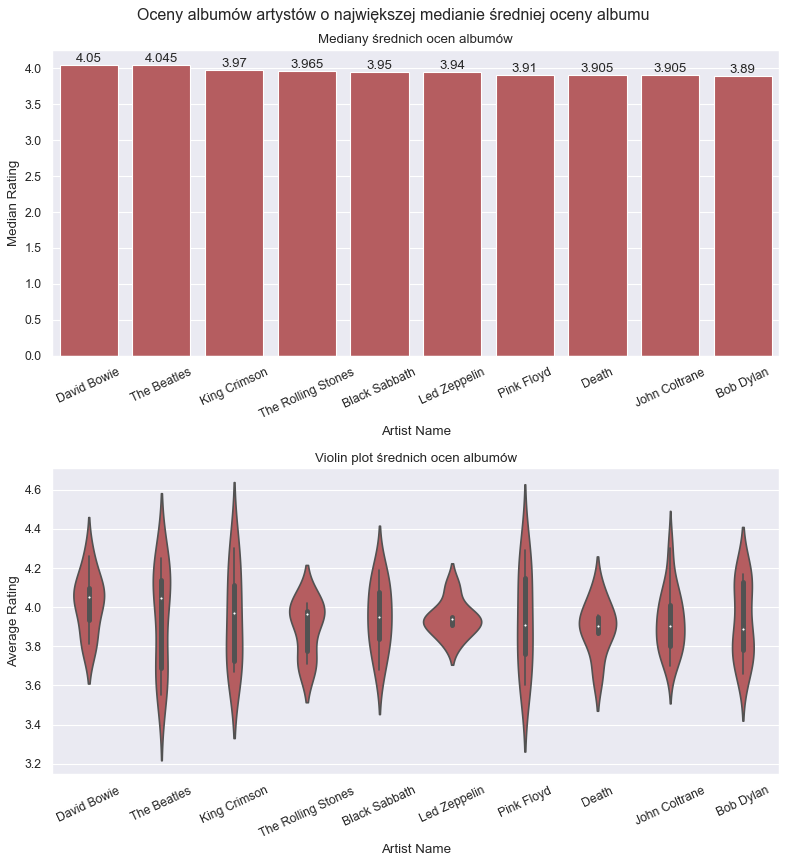

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(10, 11), dpi=80)
sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 10)

df_1 = df_1.sort_values(by='Median Rating', ascending=False).head(10)
best = df_1['Artist Name']
plt.subplot(211)
ax1 = sns.barplot(data = df_1,
           x = 'Artist Name',
           y = 'Median Rating',
           color = 'r')
ax1.bar_label(ax1.containers[0])
ax1 = plt.xticks(rotation=25)
plt.title('Mediany średnich ocen albumów')

plt.subplot(212)
df_violin = df[df['Artist Name'].isin(best)]
ax2 = sns.violinplot(x='Artist Name', y='Average Rating', data=df_violin, order=best, color = 'r')
ax2 = plt.xticks(rotation=25)
plt.title('Violin plot średnich ocen albumów')
plt.suptitle('Oceny albumów artystów o największej medianie średniej oceny albumu')

plt.tight_layout()
plt.show()

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 